# **Proyek Klasifikasi Gambar : Vegetable Image Dataset**
- Nama : Idha Kurniawati
- Email : idhakurniawati03@gmail.com
- ID Dicoding : idhakt

Dataset: https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset

## Import Semua Packages/Library yang Digunakan

In [1]:
# Mengimpor libraries umum yang sering digunakan
import os, shutil
import zipfile
import random
from random import sample
import shutil
from shutil import copyfile
import pathlib
from pathlib import Path
import pandas as pd
from tqdm.notebook import tqdm as tq
import numpy as np

# Mengimpor libraries untuk visualisasi
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

# Mengimpor libraries untuk pemrosesan data gambar
import cv2
from PIL import Image
import skimage
from skimage import io
from skimage.transform import resize
from skimage.transform import rotate, AffineTransform, warp
from skimage import img_as_ubyte
from skimage.exposure import adjust_gamma
from skimage.util import random_noise

# Mengimpor libraries untuk pembuatan dan evaluasi model
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras import Model, layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.layers import InputLayer, Conv2D, SeparableConv2D, MaxPooling2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import MobileNet, MobileNetV2
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau
!pip install tensorflowjs
import tensorflowjs as tfjs
from sklearn.metrics import classification_report, confusion_matrix

# Mengabaikan peringatan
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import time
import random
import collections

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 2.8 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.31.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


## Data Preparation

### Data Loading

In [2]:
# Import module yang disediakan google colab untuk kebutuhan upload file

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"idhaku","key":"6e07e24df4a7142a649630b2d9c38b4b"}'}

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!rm -rf Vegetable Images/
!kaggle datasets download -d misrakahmed/vegetable-image-dataset
!unzip -q vegetable-image-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset
License(s): CC-BY-SA-4.0


In [5]:
path = '/content/Vegetable Images'

if os.path.exists(path):
  folders = [f for f in os.listdir(path) if os.path.isdir(os.path.join(path, f))]
  print(f"Folders in the dataset: {folders}")
else:
  print(f"Dataset directory not found at: {path}")

Folders in the dataset: ['validation', 'train', 'test']


In [6]:
source_dirs = ['train', 'validation', 'test']
combined_dir = 'dataset'
os.makedirs(combined_dir, exist_ok=True)
source_dirs = ['train', 'validation', 'test']
combined_dir = 'dataset'
os.makedirs(combined_dir, exist_ok=True)

for source in source_dirs:
    source_path = os.path.join(path, source)
    for class_name in os.listdir(source_path):
        class_dir = os.path.join(source_path, class_name)
        combined_class_dir = os.path.join(combined_dir, class_name)
        os.makedirs(combined_class_dir, exist_ok=True)
        for filename in os.listdir(class_dir):
            src_file = os.path.join(class_dir, filename)
            dst_file = os.path.join(combined_class_dir, filename)

            if not os.path.exists(dst_file):
                shutil.copy2(src_file, dst_file)

print("Penggabungan selesai. Semua data ada di folder 'dataset'.")

Penggabungan selesai. Semua data ada di folder 'dataset'.


In [7]:
dataset_path = os.path.abspath('dataset')
print(f"Folder 'dataset' tersimpan di: {dataset_path}")

Folder 'dataset' tersimpan di: /content/dataset


In [8]:
def count_img(directory):
    total = 0
    for root, dirs, files in os.walk(directory):
        total += len([file for file in files if file.endswith(('.jpg', '.jpeg', '.png'))])
    return total

folders = [f for f in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, f))]

folder_counts = {}
for folder in folders:
    folder_path = os.path.join(dataset_path, folder)
    image_count = count_img(folder_path)
    folder_counts[folder] = image_count

sorted_folder_counts = collections.OrderedDict(sorted(folder_counts.items(), key=lambda item: item[1], reverse=True))

print("Folder di dalam 'dataset' dan jumlah gambar:")
for folder, count in sorted_folder_counts.items():
    print(f"- {folder}: {count} gambar")

print(f"\nTotal gambar di folder 'dataset': {sum(sorted_folder_counts.values())}")

Folder di dalam 'dataset' dan jumlah gambar:
- Cabbage: 1400 gambar
- Pumpkin: 1400 gambar
- Potato: 1400 gambar
- Bottle_Gourd: 1400 gambar
- Bitter_Gourd: 1400 gambar
- Tomato: 1400 gambar
- Radish: 1400 gambar
- Cauliflower: 1400 gambar
- Bean: 1400 gambar
- Brinjal: 1400 gambar
- Capsicum: 1400 gambar
- Broccoli: 1400 gambar
- Cucumber: 1400 gambar
- Carrot: 1400 gambar
- Papaya: 1400 gambar

Total gambar di folder 'dataset': 21000


### Data Preprocessing

#### Split Dataset

In [9]:
def split_dataset(dataset_dir, train_ratio=0.7, test_ratio=0.1, val_ratio=0.2):
    if train_ratio + test_ratio + val_ratio != 1.0:
        raise ValueError("Rasio train, test, dan validasi harus berjumlah 1.0")

    for class_name in os.listdir(dataset_dir):
        class_dir = os.path.join(dataset_dir, class_name)
        if os.path.isdir(class_dir):
            images = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]
            random.shuffle(images)
            total_images = len(images)
            train_split = int(total_images * train_ratio)
            test_split = int(total_images * test_ratio) + train_split
            val_split = int(total_images * val_ratio) + test_split


            train_images = images[:train_split]
            test_images = images[train_split:test_split]
            val_images = images[test_split:]


            for split, split_name in zip([train_images, test_images, val_images], ['train', 'test', 'validation']):
                split_dir = os.path.join(dataset_dir, '..', split_name, class_name)
                os.makedirs(split_dir, exist_ok=True)
                for image in split:
                    source_path = os.path.join(class_dir, image)
                    destination_path = os.path.join(split_dir, image)
                    shutil.move(source_path, destination_path)

            if not os.listdir(class_dir):
                os.rmdir(class_dir)

split_dataset(dataset_path)

In [10]:
train_dir = os.path.join(path, 'train')
val_dir = os.path.join(path, 'validation')
test_dir = os.path.join(path, 'test')

In [11]:
# menghitung jumlah file gambar dalam folder dan subfolder
def count_img(directory):
    total = 0
    for root, dirs, files in os.walk(directory):
        total += len([file for file in files if file.endswith(('.jpg', '.jpeg', '.png'))])
    return total

train_count = count_img(train_dir)
val_count = count_img(val_dir)
test_count = count_img(test_dir)
total_images = train_count + val_count + test_count

# Menghitung persentase
train_percentage = (train_count / total_images) * 100
val_percentage = (val_count / total_images) * 100
test_percentage = (test_count / total_images) * 100

print(f"Jumlah gambar di folder train     : {train_count} ({train_percentage:.2f}%)")
print(f"Jumlah gambar di folder validation: {val_count} ({val_percentage:.2f}%)")
print(f"Jumlah gambar di folder test      : {test_count} ({test_percentage:.2f}%)")
print(f"Total seluruh gambar              : {total_images}")

Jumlah gambar di folder train     : 15000 (71.43%)
Jumlah gambar di folder validation: 3000 (14.29%)
Jumlah gambar di folder test      : 3000 (14.29%)
Total seluruh gambar              : 21000


In [12]:
def list_classes(directory):
    class_names = sorted(os.listdir(directory))
    class_names = [folder for folder in class_names if os.path.isdir(os.path.join(directory, folder))]
    return class_names

def count_data(directory, class_names):
    class_counts = {}
    for class_name in class_names:
        class_dir = os.path.join(directory, class_name)
        class_counts[class_name] = len([f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))])
    return class_counts

# Mendapatkan daftar kelas untuk setiap direktori
train_classes = list_classes(train_dir)
val_classes = list_classes(val_dir)
test_classes = list_classes(test_dir)

# Mendapatkan jumlah data untuk setiap kelas
train_counts = count_data(train_dir, train_classes)
val_counts = count_data(val_dir, val_classes)
test_counts = count_data(test_dir, test_classes)

# Menampilkan daftar kelas dan jumlah data
print("Daftar kelas dalam direktori train:")
for i, class_name in enumerate(train_classes):
    print(f"{i+1}. {class_name}: {train_counts[class_name]} data")

print("\nDaftar kelas dalam direktori validation:")
for i, class_name in enumerate(val_classes):
    print(f"{i+1}. {class_name}: {val_counts[class_name]} data")

print("\nDaftar kelas dalam direktori test:")
for i, class_name in enumerate(test_classes):
    print(f"{i+1}. {class_name}: {test_counts[class_name]} data")

Daftar kelas dalam direktori train:
1. Bean: 1000 data
2. Bitter_Gourd: 1000 data
3. Bottle_Gourd: 1000 data
4. Brinjal: 1000 data
5. Broccoli: 1000 data
6. Cabbage: 1000 data
7. Capsicum: 1000 data
8. Carrot: 1000 data
9. Cauliflower: 1000 data
10. Cucumber: 1000 data
11. Papaya: 1000 data
12. Potato: 1000 data
13. Pumpkin: 1000 data
14. Radish: 1000 data
15. Tomato: 1000 data

Daftar kelas dalam direktori validation:
1. Bean: 200 data
2. Bitter_Gourd: 200 data
3. Bottle_Gourd: 200 data
4. Brinjal: 200 data
5. Broccoli: 200 data
6. Cabbage: 200 data
7. Capsicum: 200 data
8. Carrot: 200 data
9. Cauliflower: 200 data
10. Cucumber: 200 data
11. Papaya: 200 data
12. Potato: 200 data
13. Pumpkin: 200 data
14. Radish: 200 data
15. Tomato: 200 data

Daftar kelas dalam direktori test:
1. Bean: 200 data
2. Bitter_Gourd: 200 data
3. Bottle_Gourd: 200 data
4. Brinjal: 200 data
5. Broccoli: 200 data
6. Cabbage: 200 data
7. Capsicum: 200 data
8. Carrot: 200 data
9. Cauliflower: 200 data
10. Cucumb

In [13]:
img_height, img_width = 224, 224
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


## Modelling

In [14]:
mobilenet_base = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)
mobilenet_base.trainable = False


model = Sequential()
model.add(mobilenet_base)
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dense(15, activation='softmax'))

# Compile model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 7, 7, 64)       │       737,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │        15,375 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,077,263 (11.74 MB)

 Trainable params: 819,279 (3.13 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [16]:
# Mulai hitung waktu
start_time = time.time()

# Callback
class DualAccuracyThresholdCallback(Callback):
    def __init__(self, threshold=0.97):
        super().__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        acc = logs.get('accuracy')
        val_acc = logs.get('val_accuracy')

        if acc is not None and val_acc is not None:
            if acc >= self.threshold and val_acc >= self.threshold:
                print(f"\n accuracy: {acc*100:.2f}% & val_accuracy: {val_acc*100:.2f}% >= {self.threshold*100:.0f}%")
                print(" Training dihentikan karena sudah mencapai threshold akurasi.")
                self.model.stop_training = True

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
dual_acc_threshold = DualAccuracyThresholdCallback(threshold=0.97)

# Training model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=[early_stop, dual_acc_threshold]
)

# Hitung durasi
end_time = time.time()
elapsed_time = end_time - start_time
minutes = int(elapsed_time // 60)
seconds = int(elapsed_time % 60)
print(f"\n Waktu eksekusi: {minutes} menit {seconds} detik")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 211s 423ms/step - accuracy: 0.7361 - loss: 0.8158 - val_accuracy: 0.9793 - val_loss: 0.0668
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 257s 427ms/step - accuracy: 0.8871 - loss: 0.3622 - val_accuracy: 0.9857 - val_loss: 0.0490
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 196s 418ms/step - accuracy: 0.8946 - loss: 0.3571 - val_accuracy: 0.9943 - val_loss: 0.0174
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 195s 416ms/step - accuracy: 0.9204 - loss: 0.2925 - val_accuracy: 0.9953 - val_loss: 0.0171
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 194s 413ms/step - accuracy: 0.9375 - loss: 0.2097 - val_accuracy: 0.9953 - val_loss: 0.0135
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 196s 418ms/step - accuracy: 0.9403 - loss: 0.2126 - val_accuracy: 0.9957 - val_loss: 0.0173
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 200s 413ms/step - accuracy: 0.9361 - loss: 0.2293 - val_accuracy: 0.9953 - val_loss: 0.0128
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 195s 415ms/step - accuracy: 0.9476 -

In [17]:
model.save("saved_model.h5")

## Evaluasi dan Visualisasi

### Evaluasi

In [18]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")

94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.9943 - loss: 0.0169

Test Accuracy: 99.53%


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


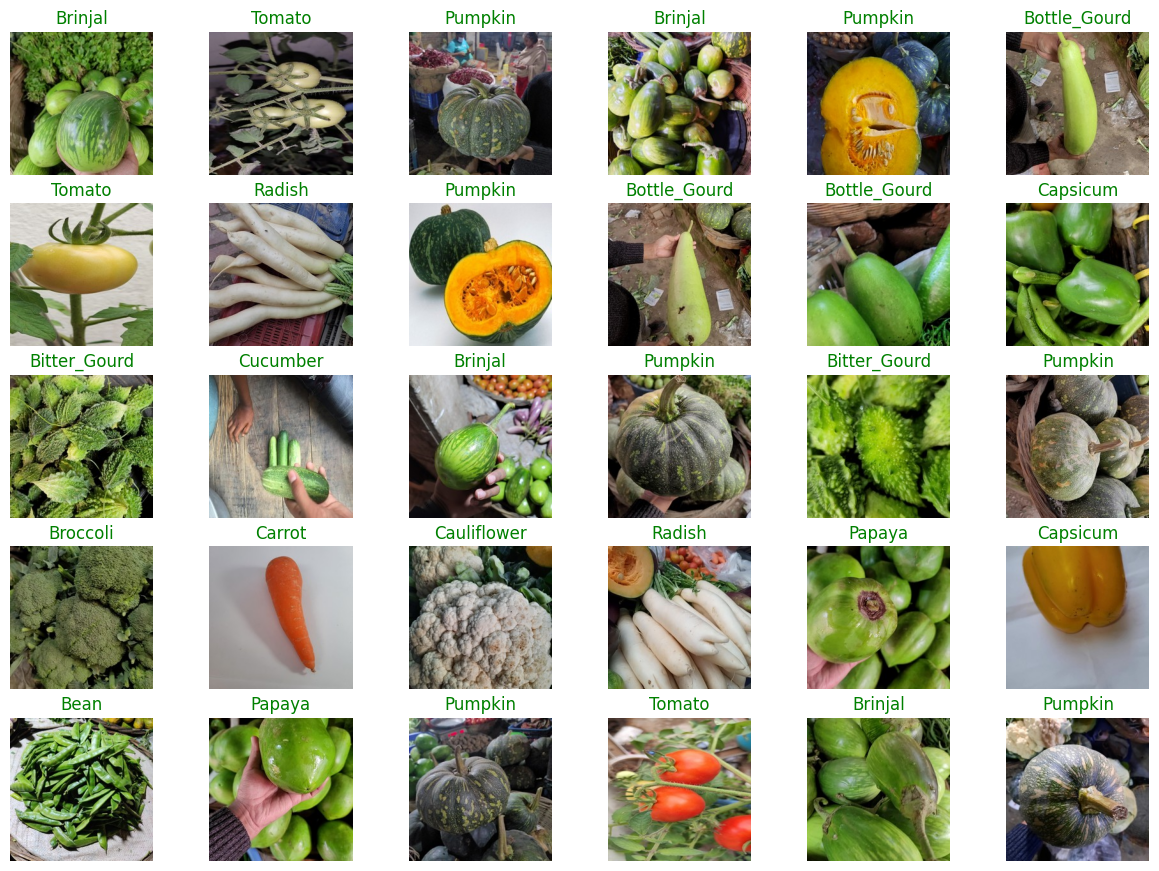

In [19]:
img, labels = next(val_generator)
predictions = model.predict(img)
plt.figure(figsize=(15, 13))
for i in range(30):
    ax = plt.subplot(6, 6, i + 1)
    plt.imshow(img[i])
    predicted_class = predictions[i].argmax()
    true_class = labels[i].argmax()

    class_names = list(val_generator.class_indices.keys())

    predicted_label = class_names[predicted_class]
    true_label = class_names[true_class]

    if predicted_class == true_class:
        plt.title(predicted_label, color='green')
    else:
        plt.title(f"Pred: {predicted_label}, True: {true_label}", color='red')
    plt.axis("off")
plt.show()


### Visualisasi

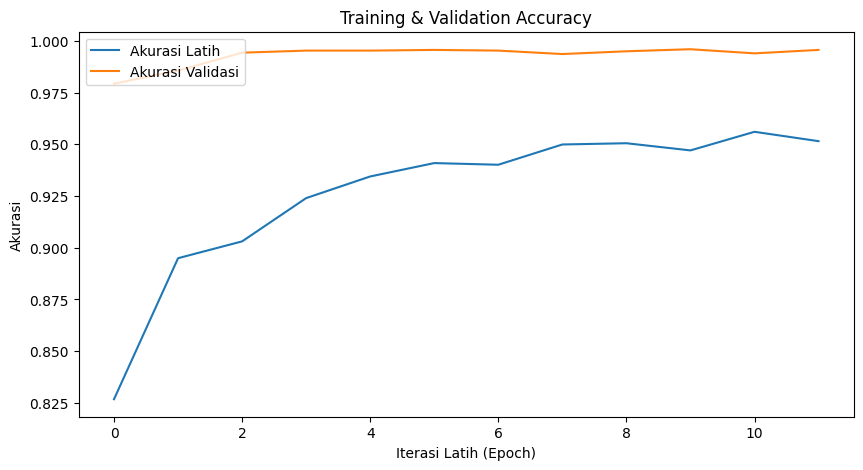

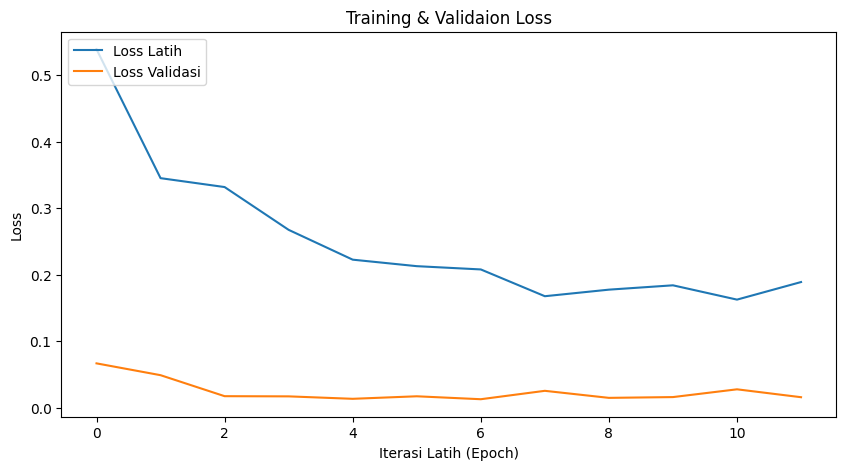

In [20]:
# Menggambarkan perubahan akurasi pada set pelatihan dan validasi
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Akurasi Latih')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.title('Training & Validation Accuracy')
plt.ylabel('Akurasi')
plt.xlabel('Iterasi Latih (Epoch)')
plt.legend(loc='upper left')
plt.show()

# Menggambarkan perubahan nilai loss pada set pelatihan dan validasi
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Loss Latih')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.title('Training & Validaion Loss')
plt.ylabel('Loss')
plt.xlabel('Iterasi Latih (Epoch)')
plt.legend(loc='upper left')
plt.show()

Berdasarkan grafik di atas dapat disimpulkan bahwa:

- Tidak ada indikasi overfitting maupun underfitting pada grafik ini.

- Kinerja model sangat baik karena loss validasi sangat rendah dan stabil sepanjang epoch.

94/94 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step


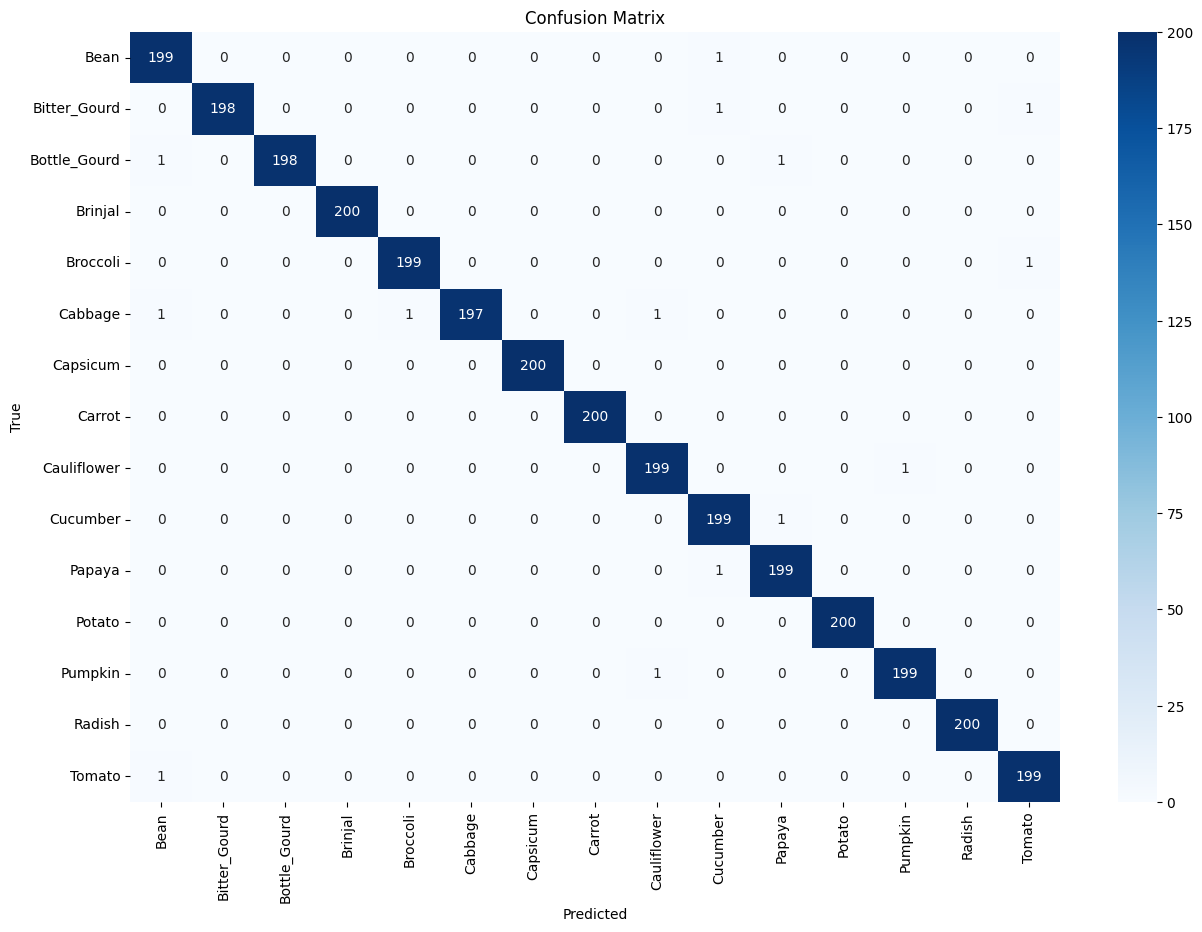

In [21]:
# Prediksi dan klasifikasikan gambar uji
y_pred = np.argmax(model.predict(test_generator), axis=1)
y_true = test_generator.classes

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Berdasarkan Confusion Matrix ini, dapat disimpulkan bahwa:

- Sebagian besar angka terkonsentrasi di sepanjang diagonal utama, dengan nilai yang relatif tinggi. Hal ini menunjukkan bahwa model secara keseluruhan memiliki akurasi yang tinggi dalam mengklasifikasikan berbagai jenis sayuran.

- Model memiliki kinerja yang cukup konsisten di seluruh 15 kelas sayuran, dengan sebagian besar kelas memiliki jumlah prediksi benar mendekati jumlah total sampel per kelas.

In [22]:
# Classification report
print(classification_report(y_true, y_pred, target_names=class_names))

              precision    recall  f1-score   support

        Bean       0.99      0.99      0.99       200
Bitter_Gourd       1.00      0.99      0.99       200
Bottle_Gourd       1.00      0.99      0.99       200
     Brinjal       1.00      1.00      1.00       200
    Broccoli       0.99      0.99      0.99       200
     Cabbage       1.00      0.98      0.99       200
    Capsicum       1.00      1.00      1.00       200
      Carrot       1.00      1.00      1.00       200
 Cauliflower       0.99      0.99      0.99       200
    Cucumber       0.99      0.99      0.99       200
      Papaya       0.99      0.99      0.99       200
      Potato       1.00      1.00      1.00       200
     Pumpkin       0.99      0.99      0.99       200
      Radish       1.00      1.00      1.00       200
      Tomato       0.99      0.99      0.99       200

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00   

Berdasarkan laporan klasifikasi ini, dapat disimpulkan bahwa:
- Akurasi keseluruhan model adalah 1.00 (atau 100%), yang berarti model berhasil mengklasifikasikan semua 3000 gambar dalam data pengujian dengan benar.

- Sebagian besar kelas memiliki presisi dan recall sebesar 1.00, yang menunjukkan bahwa model tidak membuat kesalahan dalam memprediksi kelas tersebut (presisi tinggi) dan berhasil mengidentifikasi semua instance dari kelas tersebut (recall tinggi).

- Memiliki F1-Score yang mendekati atau sama dengan 1.00.

-  Rata-rata makro dan rata-rata tertimbang untuk presisi, recall, dan F1-skor semuanya 1.00, yang menegaskan kinerja model yang luar biasa di semua kelas, baik secara individual maupun secara keseluruhan.


## Konversi Model

### SavedModel

In [23]:
# SavedModel
tf.saved_model.save(model, "saved_model")

### TF-Lite

In [24]:
class_names = list(train_generator.class_indices.keys())

# label.txt
with open('labels.txt', 'w') as f:
    for class_name in class_names:
        f.write(f"{class_name}\n")

# TF-Lite
converter = tf.lite.TFLiteConverter.from_saved_model("saved_model")
tflite_model = converter.convert()
with open("model.tflite", "wb") as f:
    f.write(tflite_model)

### TFJS

In [25]:
# TFJS
tfjs.converters.save_keras_model(model, "tfjs_model")

failed to lookup keras version from the file,
    this is likely a weight only file


## Inference (Optional)

In [26]:
# Path ke model SavedModel
saved_model_path = "saved_model"
loaded_model = tf.saved_model.load(saved_model_path)

print(loaded_model.signatures['serving_default'].structured_outputs)

{'output_0': TensorSpec(shape=(None, 15), dtype=tf.float32, name='output_0')}


In [29]:
# Path direktori tes
test_dir = '/content/Vegetable Images/test'
kelas = sorted([f for f in os.listdir(test_dir) if os.path.isdir(os.path.join(test_dir, f))])

ukuran_gambar = (224, 224)

def muat_dan_proses(path):
    img = image.load_img(path, target_size=ukuran_gambar)
    arr = image.img_to_array(img) / 255.0
    return np.expand_dims(arr, axis=0)

jumlah_contoh = 5
daftar_path_gambar_tes = []
for nama_kelas in kelas:
    path_kelas = os.path.join(test_dir, nama_kelas)
    daftar_file = [f for f in os.listdir(path_kelas) if f.endswith(('.jpg', '.jpeg', '.png'))]
    if daftar_file:
        ambil_contoh = min(jumlah_contoh // len(kelas) + 1, len(daftar_file))
        path_contoh = [os.path.join(path_kelas, nama_file) for nama_file in daftar_file[:ambil_contoh]]
        daftar_path_gambar_tes.extend(path_contoh)
        if len(daftar_path_gambar_tes) >= jumlah_contoh:
            break

print("Inferensi dengan SavedModel:")
infer = loaded_model.signatures['serving_default']

for path_gambar in daftar_path_gambar_tes:
    citra_terproses = muat_dan_proses(path_gambar)
    prediksi = infer(tf.constant(citra_terproses, dtype=tf.float32))['output_0'] # Nama layer output
    kelas_prediksi = kelas[np.argmax(prediksi)]
    kelas_sebenarnya = os.path.basename(os.path.dirname(path_gambar))
    kepercayaan = prediksi[0][np.argmax(prediksi)]
    nama_file = os.path.basename(path_gambar)
    print(f"Gambar: {nama_file}, Sebenarnya: {kelas_sebenarnya}, Prediksi: {kelas_prediksi} ({kepercayaan:.4f})")

Inferensi dengan SavedModel:
Gambar: 0315.jpg, Sebenarnya: Bean, Prediksi: Bean (0.9999)
Gambar: 1377.jpg, Sebenarnya: Bitter_Gourd, Prediksi: Bitter_Gourd (1.0000)
Gambar: 1022.jpg, Sebenarnya: Bottle_Gourd, Prediksi: Bottle_Gourd (0.9999)
Gambar: 1022.jpg, Sebenarnya: Brinjal, Prediksi: Brinjal (1.0000)
Gambar: 1022.jpg, Sebenarnya: Broccoli, Prediksi: Broccoli (1.0000)


In [30]:
!pip freeze > requirements.txt